# Training and Validation losses

In [10]:
# Reloads modules automatically before executing code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# Imports
import os
from torch.utils.data import DataLoader as TorchDataLoader
from DL_vs_HateSpeech.loading_data.dataloader import DataLoader
from DL_vs_HateSpeech.training.training import collate_fn
from DL_vs_HateSpeech.plots.plot_loss import plot_losses_from_path
from DL_vs_HateSpeech.models.model_v0 import ModelV0
from DL_vs_HateSpeech.models import load_model_from_path
device = "cpu"


## Model v0

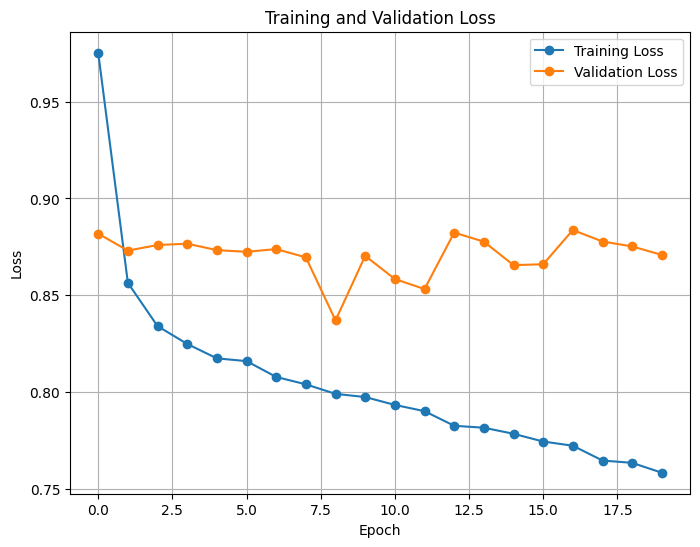

In [12]:
path = "./models/model_checkpoints/model_0"
# See the files in the path
plot_losses_from_path(path)

In [ ]:
model = load_model_from_path(path, device=device)
model.eval()

# Load Data
train_dataset = DataLoader(type="train")
val_dataset = DataLoader(type="val")
BATCH_SIZE = 16

train_loader = TorchDataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader = TorchDataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

for images, texts, labels in val_loader:
        probs = model(texts, images)

        # Compute predictions (get the class with the highest probability)
        preds = torch.argmax(probs, dim=1)

        # Calculate accuracy
        correct += (preds == labels).sum().item()
        total += labels.size(0)

ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).